# Visualisierung

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds_guests = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv", 
                                encoding="unicode_escape", header=0)

In [3]:
#Umbenennung der Spaltennamen
ds_guests.rename(columns={'Raw_Guest_List':'Guest',
                         'GoogleKnowlege_Occupation':'Occupation',
                         'Show':'Date'}, inplace=True)

#Berechnung der Anzahl der Vornamen
ds_guests["Forename Number"] = ds_guests.Guest.apply(lambda guest: (len(guest.split(" ")) - 1))

ds_guests["Date"] = pd.to_datetime(ds_guests.Date)
ds_guests.set_index("Date", inplace=True)

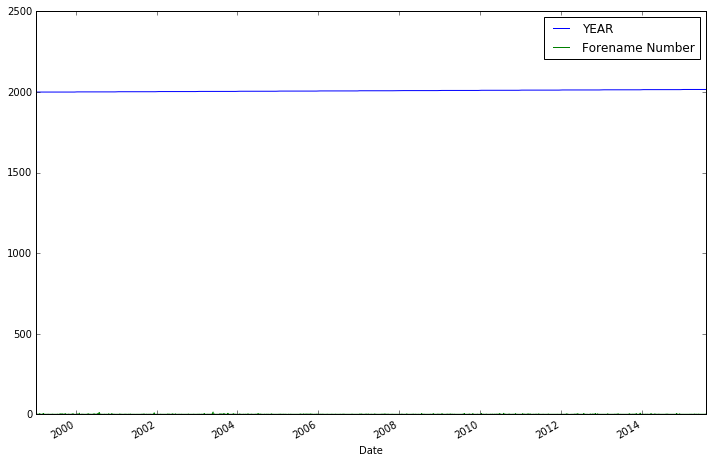

In [4]:
# Per Default wird jede numerische Spalte in einem Dataframe erkannt und als eigenständiger Subplot gezeichnet
# Erkennst Du die grüne Linie?

ds_guests.plot(figsize=(12,8))

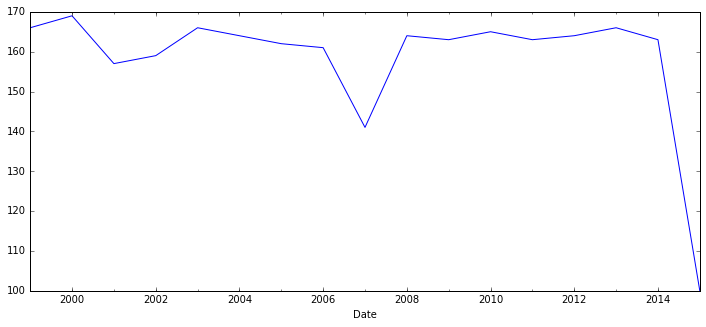

In [5]:
ds_guests.groupby(pd.Grouper(freq="1A")).Guest.count().plot(figsize=(12,5))

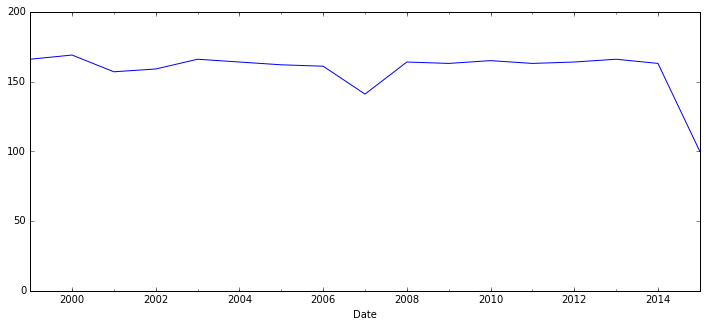

In [6]:
# Achtet immer auf die Achsenbeschriftungen! Viele Fehlentscheidungen können durch falsche Interpretationen entstehen 
ds_guests.groupby(pd.Grouper(freq="1A")).Guest.count().plot(figsize=(12,5), ylim=(0,200))

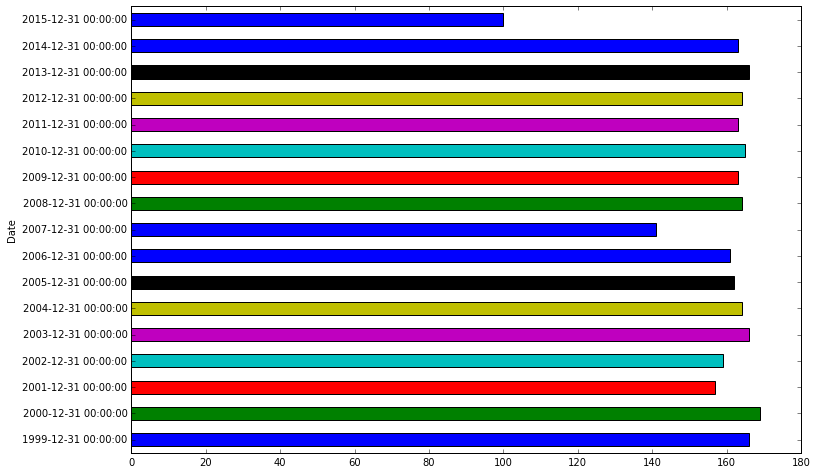

In [7]:
ds_guests.groupby(pd.Grouper(freq="1A")).Guest.count().plot(kind="barH", figsize=(12,8))

# Weitere Möglichkeiten sind gem. pandas.DataFrame.plot.html: 
# ‘line’ : line plot (default)
# ‘bar’ : vertical bar plot
# ‘barh’ : horizontal bar plot
# ‘hist’ : histogram
# ‘box’ : boxplot
# ‘kde’ : Kernel Density Estimation plot
# ‘density’ : same as ‘kde’
# ‘area’ : area plot
# ‘pie’ : pie plot
# ‘scatter’ : scatter plot
# ‘hexbin’ : hexbin plot

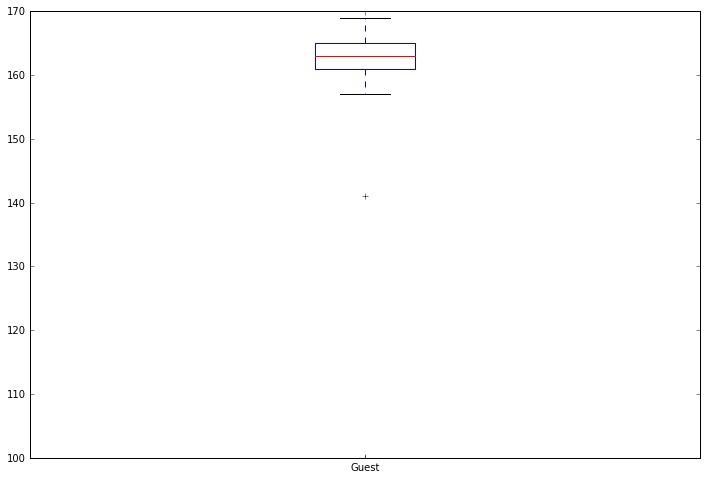

In [8]:
ds_guests.groupby(pd.Grouper(freq="1A")).Guest.count().plot(kind="box", figsize=(12,8))

## Wie können wir einen Graph erstellen, der wiederspiegelt wie stark die einzelnen Kategorien bei der Daily Show über die Jahre hinweg vertreten waren.


In [9]:
# Wie viel Gäste waren pro Kategorie da
ds_guests.groupby([pd.Grouper(freq="1A"),"Group"]).count().Guest.head(10)

Date        Group     
1999-12-31  Acting        108
            Comedy         25
            Media          11
            Musician       17
            Politician      2
2000-12-31  Acting        100
            Advocacy        1
            Athletics       3
            Business        1
            Comedy         12
Name: Guest, dtype: int64

In [10]:
# Wandle die zweite Indexebene in Spalten um
ds_guests.groupby([pd.Grouper(freq="1A"),"Group"]).count().Guest.unstack().head()

Group,Academic,Acting,Advocacy,Athletics,Business,Clergy,Comedy,Consultant,Government,Media,Military,Misc,Musician,Political Aide,Politician,Science,media
Date,,,,,,,,,,,,,,,,,
1999-12-31,NaN,108.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,11.0,NaN,NaN,17.0,NaN,2.0,NaN,NaN
2000-12-31,NaN,100.0,1.0,3.0,1.0,NaN,12.0,NaN,NaN,21.0,NaN,NaN,13.0,1.0,13.0,NaN,NaN
2001-12-31,2.0,92.0,NaN,1.0,NaN,NaN,11.0,NaN,2.0,30.0,NaN,2.0,11.0,1.0,3.0,NaN,1.0
2002-12-31,NaN,84.0,1.0,2.0,NaN,1.0,5.0,NaN,1.0,39.0,NaN,1.0,10.0,2.0,8.0,NaN,3.0
2003-12-31,4.0,74.0,NaN,NaN,NaN,1.0,12.0,1.0,2.0,41.0,NaN,1.0,7.0,1.0,14.0,1.0,NaN


In [11]:
ds_guests.groupby([pd.Grouper(freq="1A"),"Group"]).count().Guest.unstack()

Group,Academic,Acting,Advocacy,Athletics,Business,Clergy,Comedy,Consultant,Government,Media,Military,Misc,Musician,Political Aide,Politician,Science,media
Date,,,,,,,,,,,,,,,,,
1999-12-31,NaN,108.0,NaN,NaN,NaN,NaN,25.0,NaN,NaN,11.0,NaN,NaN,17.0,NaN,2.0,NaN,NaN
2000-12-31,NaN,100.0,1.0,3.0,1.0,NaN,12.0,NaN,NaN,21.0,NaN,NaN,13.0,1.0,13.0,NaN,NaN
2001-12-31,2.0,92.0,NaN,1.0,NaN,NaN,11.0,NaN,2.0,30.0,NaN,2.0,11.0,1.0,3.0,NaN,1.0
2002-12-31,NaN,84.0,1.0,2.0,NaN,1.0,5.0,NaN,1.0,39.0,NaN,1.0,10.0,2.0,8.0,NaN,3.0
2003-12-31,4.0,74.0,NaN,NaN,NaN,1.0,12.0,1.0,2.0,41.0,NaN,1.0,7.0,1.0,14.0,1.0,NaN
2004-12-31,1.0,51.0,4.0,2.0,2.0,1.0,7.0,4.0,3.0,45.0,NaN,NaN,5.0,2.0,32.0,2.0,NaN
2005-12-31,12.0,44.0,NaN,2.0,1.0,NaN,5.0,1.0,1.0,54.0,1.0,4.0,11.0,3.0,22.0,1.0,NaN
2006-12-31,9.0,44.0,NaN,5.0,1.0,NaN,8.0,4.0,3.0,47.0,1.0,3.0,6.0,3.0,25.0,1.0,NaN
2007-12-31,13.0,25.0,2.0,4.0,2.0,1.0,9.0,2.0,1.0,47.0,3.0,2.0,2.0,2.0,21.0,4.0,NaN


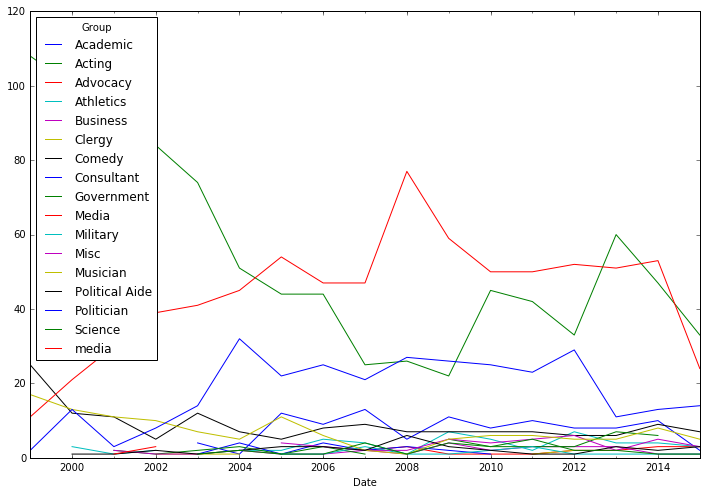

In [12]:
ds_guests.groupby([pd.Grouper(freq="1A"),"Group"]).count().Guest.unstack().plot(figsize=(12,8))

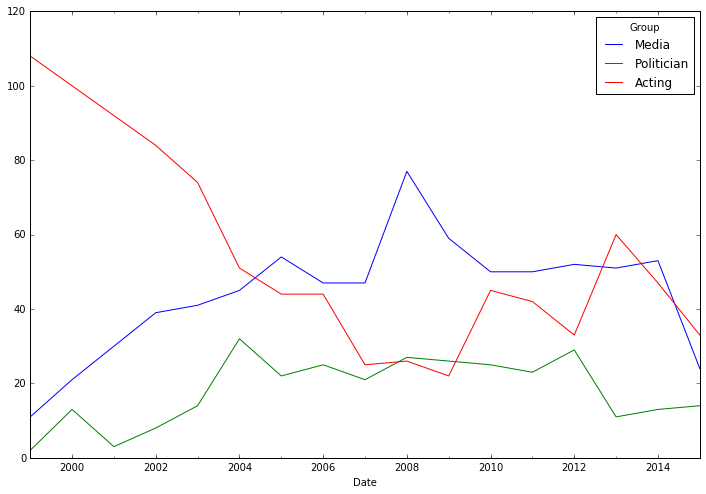

In [13]:
ds_guests.groupby([pd.Grouper(freq="1A"),"Group"]).count().Guest.unstack()[["Media", "Politician", "Acting"]].plot(figsize=(12,8))

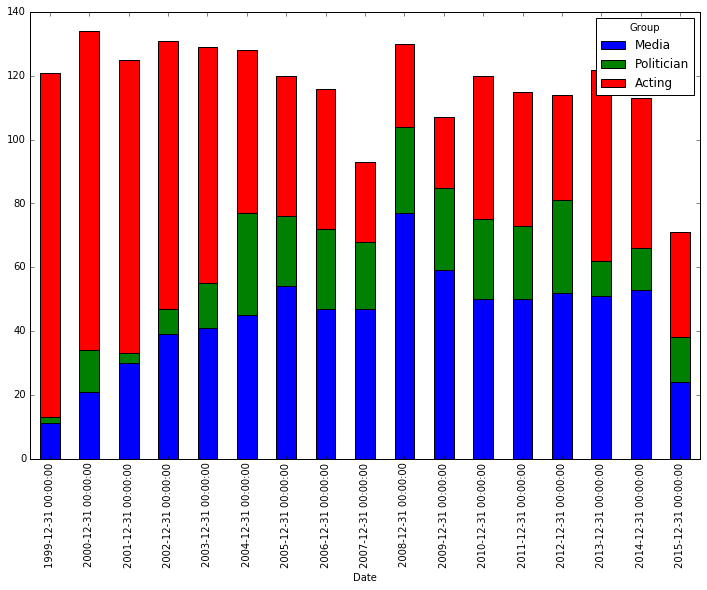

In [14]:
ds_guests.groupby([pd.Grouper(freq="1A"),"Group"]).count().Guest.unstack()[["Media", "Politician", "Acting"]].plot(kind='bar',stacked=True, figsize=(12,8))

# Aufgaben:  

- Erstelle einen Graph der die relative Häufigkeit der Gastanzahl pro Kategorie über den Zeitablauf abbildet (vlg. hierzu https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/).
- Erstelle einen Boxplot der die Häufigkeit der Vornahmenanzahl über den gesamten Zeitraum wiedergibt.
- Erstelle für das Jahr 2008 ein Tortendiagramm, das die Häufigkeit der Gäste in den entsprechenden Kategorien wiedergibt.
- Erstelle ein gestapeltes Balkendiagramm, das die Häufigkeit der Anfangsbuchstaben der Gäste aus dem Jahr 2010 wiedergibt.
- Suche und tausche das Stadard-Colormap aus.


## Erstelle einen Graph der die relative Häufigkeit der Gastanzahl pro Kategorie über den Zeitablauf abbildet (vlg. hierzu https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/).

In [15]:
#1. Create tmp1 which lists the number of aired shows per category and year 
tmp1 = ds_guests.groupby([pd.Grouper(freq="1A"),"Group"]).count().reset_index().set_index("Date")
#2. Create sum of all aired showes over all years
tmp2 = ds_guests.groupby(pd.Grouper(freq="1A")).count().Guest
#3. Merge together total of aired shows and number of grouped shows per category and year
tmp1["Total_Shows_that_Year"] = tmp2

In [16]:
#Calculate percentage
tmp1["Percentage"] = tmp1.apply(lambda row: (row["Guest"] / row["Total_Shows_that_Year"]) * 100, axis=1)
tmp1.set_index("Group", append=True, inplace=True)

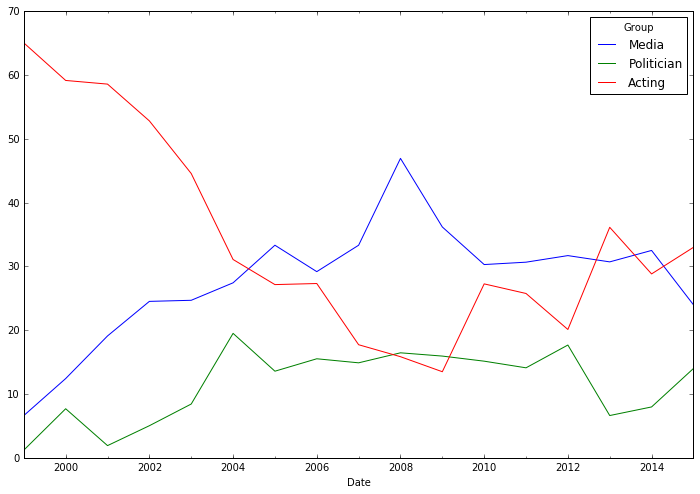

In [17]:
#Create graph
tmp1["Percentage"].unstack()[["Media", "Politician", "Acting"]].plot(kind='line', figsize=(12,8))

## Erstelle einen Boxplot der die Häufigkeit der Vornahmenanzahl über den gesamten Zeitraum wiedergibt.


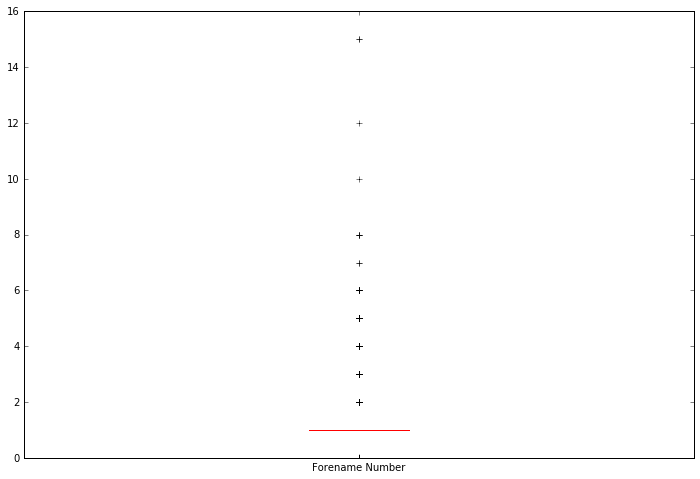

In [18]:
ds_guests["Forename Number"].plot(kind="box", figsize=(12,8))

## Erstelle für das Jahr 2008 ein Tortendiagramm, das die Häufigkeit der Gäste in den entsprechenden Kategorien wiedergibt.

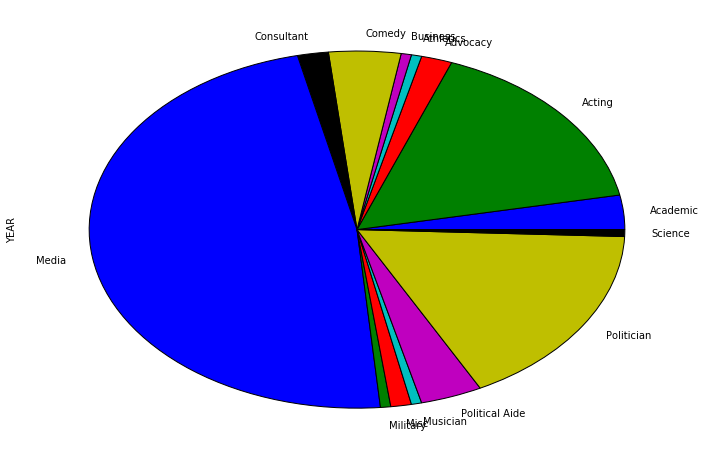

In [19]:
ds_guests["2008"].groupby("Group").count()["YEAR"].plot(kind="pie", figsize=(12,8))

## Erstelle ein gestapeltes Balkendiagramm, das die Häufigkeit der Anfangsbuchstaben der Gäste aus dem Jahr 2010 wiedergibt.

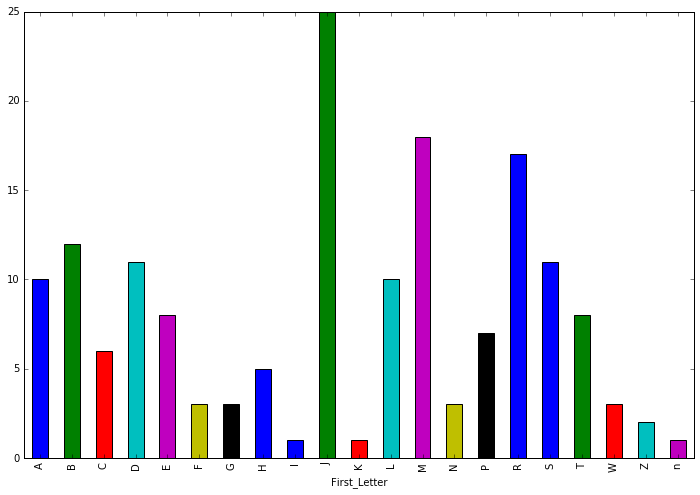

In [20]:
ds_guests["First_Letter"] = ds_guests.Guest.str[0]
ds_guests["2010"].groupby("First_Letter").count()["Guest"].plot(kind="bar", figsize=(12,8))

## Suche und tausche das Stadard-Colormap aus.

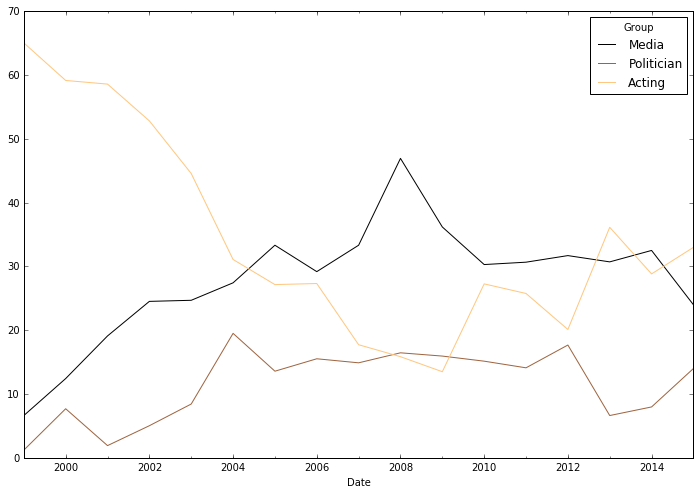

In [21]:
# Available colormaps: https://matplotlib.org/users/colormaps.html
tmp1["Percentage"].unstack()[["Media", "Politician", "Acting"]].plot(kind='line', figsize=(12,8), cmap='copper')